In [4]:
import pandas as pd

In [10]:
reviews = pd.read_csv('..\datasets\wine\winemag-data-130k-v2.csv', index_col=0)
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [33]:
reviews_written = reviews.groupby('taster_twitter_handle').size()
reviews_written

taster_twitter_handle
@AnneInVino          3685
@JoeCz               5147
@bkfiona               27
@gordone_cellars     4177
@kerinokeefe        10776
@laurbuzz            1835
@mattkettmann        6332
@paulgwine           9532
@suskostrzewa        1085
@vboone              9537
@vossroger          25514
@wawinereport        4966
@wineschach         15134
@winewchristina         6
@worldwineguys       1005
dtype: int64

In [32]:

reviews.groupby('taster_twitter_handle').taster_twitter_handle.count()

taster_twitter_handle
@AnneInVino          3685
@JoeCz               5147
@bkfiona               27
@gordone_cellars     4177
@kerinokeefe        10776
@laurbuzz            1835
@mattkettmann        6332
@paulgwine           9532
@suskostrzewa        1085
@vboone              9537
@vossroger          25514
@wawinereport        4966
@wineschach         15134
@winewchristina         6
@worldwineguys       1005
Name: taster_twitter_handle, dtype: int64

In [34]:
reviews['taster_twitter_handle'].value_counts()

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [49]:
reviews.groupby('price')['points'].max().sort_index()

price
4.0       86
5.0       87
6.0       88
7.0       91
8.0       91
          ..
1900.0    98
2000.0    97
2013.0    91
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

In [68]:
min_prices = reviews.groupby('variety')['price'].min()
min_prices.name = 'min'
max_prices = reviews.groupby('variety')['price'].max()
max_prices.name = 'max'

price_extremes = pd.concat([min_prices, max_prices], axis=1)
price_extremes.head()

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Aglianico,6.0,180.0
Aidani,27.0,27.0
Airen,8.0,10.0


In [74]:
price_extremes = reviews.groupby('variety').price.agg([min, max]).head()
price_extremes.head()

,min,max
variety,,
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Aglianico,6.0,180.0
Aidani,27.0,27.0
Airen,8.0,10.0


In [79]:
sorted_varieties = price_extremes.sort_values(['min', 'max'], ascending=False)
sorted_varieties.head()

,min,max
variety,,
Aidani,27.0,27.0
Abouriou,15.0,75.0
Agiorgitiko,10.0,66.0
Airen,8.0,10.0
Aglianico,6.0,180.0


In [89]:
reviewer_mean_rating = reviews.groupby('taster_name').points.agg('mean')
reviewer_mean_rating

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O’Keefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64

Text(0.5, 1.0, 'Distribution of average rating by each reviewer')

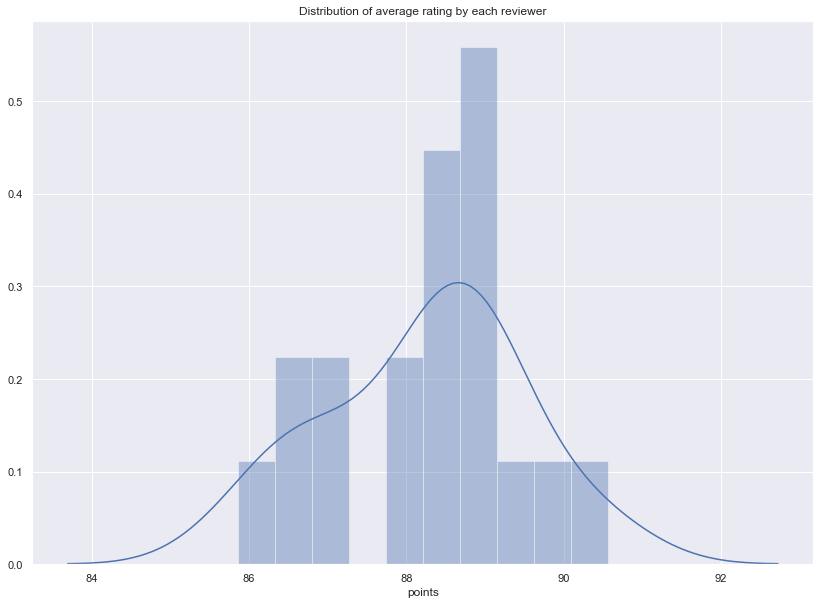

In [99]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 10))
sns.distplot(a=reviewer_mean_rating, kde=True, bins=10)
plt.title('Distribution of average rating by each reviewer')

In [102]:
reviews.groupby(['country', 'variety']).size().sort_values(ascending=False)

country    variety                 
US         Pinot Noir                  9885
           Cabernet Sauvignon          7315
           Chardonnay                  6801
France     Bordeaux-style Red Blend    4725
Italy      Red Blend                   3624
                                       ... 
Uruguay    Tempranillo-Tannat             1
Italy      Pignolo                        1
           Muscat                         1
           Moscato di Noto                1
Argentina  Barbera                        1
Length: 1612, dtype: int64